<a href="https://colab.research.google.com/github/sudo0809/Credit-Risk-Prediction/blob/main/Credit_risk_pred_UnivAI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Training%20Data.csv")
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.drop("Id", axis=1, inplace=True)
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   married              252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_years    252000 non-null  int64 
 10  current_house_years  252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


(             income            age  ...  current_house_years      risk_flag
 count  2.520000e+05  252000.000000  ...        252000.000000  252000.000000
 mean   4.997117e+06      49.954071  ...            11.997794       0.123000
 std    2.878311e+06      17.063863  ...             1.399037       0.328438
 min    1.031000e+04      21.000000  ...            10.000000       0.000000
 25%    2.503015e+06      35.000000  ...            11.000000       0.000000
 50%    5.000694e+06      50.000000  ...            12.000000       0.000000
 75%    7.477502e+06      65.000000  ...            13.000000       0.000000
 max    9.999938e+06      79.000000  ...            14.000000       1.000000
 
 [8 rows x 6 columns], None)

In [7]:
df.isnull().values.any()

False

In [8]:
df.shape

(252000, 12)

In [9]:
print(f"count of risk flag = 1 is {df[df['risk_flag']==1].shape[0]} i.e {(df[df['risk_flag']==1].shape[0]/df.shape[0])*100} % of total data")
print(f"count of risk flag = 0 is {df[df['risk_flag']==0].shape[0]} i.e {(df[df['risk_flag']==0].shape[0]/df.shape[0])*100} % of total data")

count of risk flag = 1 is 30996 i.e 12.3 % of total data
count of risk flag = 0 is 221004 i.e 87.7 % of total data


## Taking only balanced Data
### 50% risk flag = 1 and 50% risk_flag = 0

In [10]:
risk_high_data = df[df['risk_flag']==1]
risk_low_data = df[df['risk_flag']==0]

m_low = min(len(risk_high_data), len(risk_low_data))

balanced_data = pd.concat([risk_high_data[:m_low], risk_low_data[:m_low]]).sample(frac=1)
print(f"Balanced Data shape = {balanced_data.shape}")
print(f"count of risk flag = 1 is {balanced_data[balanced_data['risk_flag']==1].shape[0]}")
print(f"count of risk flag = 0 is {balanced_data[balanced_data['risk_flag']==0].shape[0]}")

Balanced Data shape = (61992, 12)
count of risk flag = 1 is 30996
count of risk flag = 0 is 30996


In [11]:
cols = list(df.columns)
cols

['income',
 'age',
 'experience',
 'married',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state',
 'current_job_years',
 'current_house_years',
 'risk_flag']

In [12]:
my_dict = {}
for col_name in cols:
  if len(balanced_data[col_name].unique())<60:
    print(col_name, " = ", balanced_data[col_name].unique())
    print()
  else:
    print(f"{col_name} = {len(balanced_data[col_name].unique())} unique values")
    print()
  my_dict[col_name] = balanced_data[col_name].unique()

income = 13251 unique values

age  =  [60 71 78 30 29 47 27 66 22 63 33 68 38 57 35 73 51 61 53 25 43 34 24 50
 26 32 74 28 31 77 75 69 55 37 52 58 59 49 64 41 39 54 36 79 72 62 42 65
 67 56 44 48 46 23 76 40 45 70 21]

experience  =  [ 7  4  9 19 17 10 11 13  0  2 20 18 15  5 12  6  1  3 16 14  8]

married  =  ['single' 'married']

house_ownership  =  ['norent_noown' 'rented' 'owned']

car_ownership  =  ['no' 'yes']

profession  =  ['Software_Developer' 'Engineer' 'Civil_engineer' 'Psychologist'
 'Biomedical_Engineer' 'Lawyer' 'Aviator' 'Hotel_Manager'
 'Flight_attendant' 'Politician' 'Police_officer' 'Petroleum_Engineer'
 'Architect' 'Surveyor' 'Web_designer' 'Consultant'
 'Computer_hardware_engineer' 'Dentist' 'Librarian' 'Official' 'Drafter'
 'Statistician' 'Civil_servant' 'Chef' 'Computer_operator' 'Economist'
 'Magistrate' 'Chartered_Accountant' 'Artist' 'Geologist' 'Comedian'
 'Industrial_Engineer' 'Graphic_Designer' 'Financial_Analyst'
 'Design_Engineer' 'Army_officer' 'Microbi

In [13]:
print(my_dict['age'])

[60 71 78 30 29 47 27 66 22 63 33 68 38 57 35 73 51 61 53 25 43 34 24 50
 26 32 74 28 31 77 75 69 55 37 52 58 59 49 64 41 39 54 36 79 72 62 42 65
 67 56 44 48 46 23 76 40 45 70 21]


In [14]:
my_dict['experience'].sort()

In [15]:
my_dict['experience']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

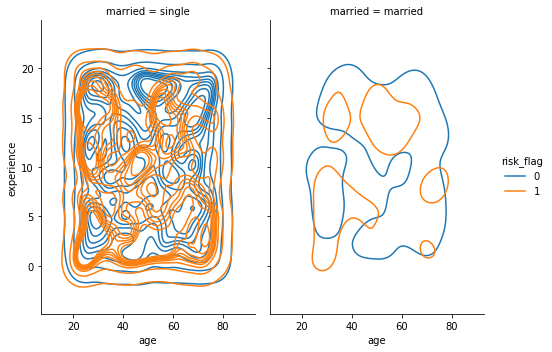

In [16]:
sns.displot(y='experience', x='age' , data=balanced_data ,hue='risk_flag', col='married' ,kind='kde', height=5, aspect=0.7)

[]

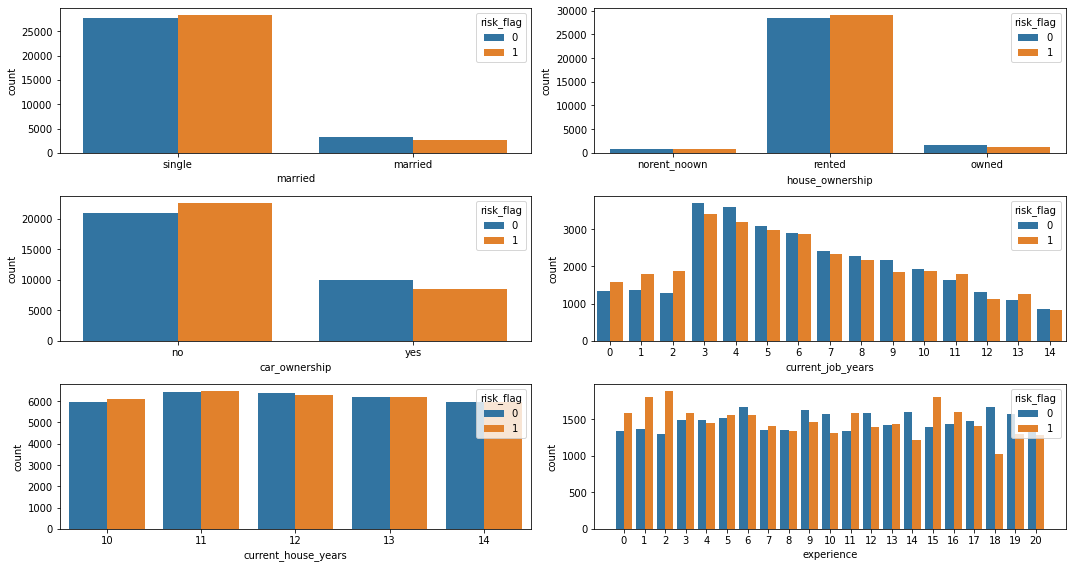

In [17]:
features = ['married', 'house_ownership','car_ownership', 'current_job_years','current_house_years', 'experience']

plt.figure(figsize=(15,8))
for i,feature in enumerate(features):
  plt.subplot(len(features)/2, 2, i+1)
  sns.countplot(x=feature, data=balanced_data, hue='risk_flag')
plt.tight_layout()
plt.plot()

## Encoding the Categorical Data

In [18]:
married_le = preprocessing.LabelEncoder()
married_le.fit(balanced_data['married'].unique())
print(married_le.classes_)
balanced_data['married'] = married_le.transform(balanced_data["married"])
balanced_data['married'].unique()

['married' 'single']


array([1, 0])

In [19]:
car_le = preprocessing.LabelEncoder()
car_le.fit(balanced_data['car_ownership'].unique())
print(car_le.classes_)
balanced_data['car_ownership'] = car_le.transform(balanced_data['car_ownership'])
balanced_data['car_ownership'].unique()

['no' 'yes']


array([0, 1])

In [20]:
house_le = preprocessing.LabelEncoder()
house_le.fit(balanced_data['house_ownership'].unique())
print(house_le.classes_)
balanced_data['house_ownership'] = house_le.transform(balanced_data['house_ownership'])
balanced_data['house_ownership'].unique()

['norent_noown' 'owned' 'rented']


array([0, 2, 1])

In [21]:
hash_enc = ce.hashing.HashingEncoder(cols='profession' , max_process=4)
# hash_enc.fit(balanced_data['profession'])

data1 = hash_enc.fit_transform(balanced_data)
print(hash_enc.get_feature_names())

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'income', 'age', 'experience', 'married', 'house_ownership', 'car_ownership', 'city', 'state', 'current_job_years', 'current_house_years', 'risk_flag']


In [22]:
data1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,income,age,experience,married,house_ownership,car_ownership,city,state,current_job_years,current_house_years,risk_flag
0,0,0,0,0,0,0,0,1,5017077,60,7,1,0,0,Katihar,Bihar,7,13,0
1,0,0,0,0,0,0,1,0,1948549,71,4,1,2,0,North_Dumdum,West_Bengal,4,12,1
2,0,0,0,0,0,0,0,1,3959820,78,9,0,2,0,Darbhanga,Bihar,9,10,1
3,0,0,0,0,0,0,0,1,6296539,30,19,1,1,0,Kalyan-Dombivli,Maharashtra,3,10,0
4,0,0,0,1,0,0,0,0,1410169,29,17,1,2,0,Ludhiana,Punjab,5,13,0


In [23]:
df_final = data1.drop(labels=['city', 'state'], axis=1)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61992 entries, 0 to 61991
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   col_0                61992 non-null  int64
 1   col_1                61992 non-null  int64
 2   col_2                61992 non-null  int64
 3   col_3                61992 non-null  int64
 4   col_4                61992 non-null  int64
 5   col_5                61992 non-null  int64
 6   col_6                61992 non-null  int64
 7   col_7                61992 non-null  int64
 8   income               61992 non-null  int64
 9   age                  61992 non-null  int64
 10  experience           61992 non-null  int64
 11  married              61992 non-null  int64
 12  house_ownership      61992 non-null  int64
 13  car_ownership        61992 non-null  int64
 14  current_job_years    61992 non-null  int64
 15  current_house_years  61992 non-null  int64
 16  risk_flag            6

In [25]:
df_final.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,0,0,0,0,0,0,0,1,5017077,60,7,1,0,0,7,13,0
1,0,0,0,0,0,0,1,0,1948549,71,4,1,2,0,4,12,1
2,0,0,0,0,0,0,0,1,3959820,78,9,0,2,0,9,10,1
3,0,0,0,0,0,0,0,1,6296539,30,19,1,1,0,3,10,0
4,0,0,0,1,0,0,0,0,1410169,29,17,1,2,0,5,13,0


In [26]:
scaler = preprocessing.MinMaxScaler()

In [27]:
scaler.fit(df_final)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
scaler.data_max_ , scaler.data_min_

(array([1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 9.99918e+06, 7.90000e+01,
        2.00000e+01, 1.00000e+00, 2.00000e+00, 1.00000e+00, 1.40000e+01,
        1.40000e+01, 1.00000e+00]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.031e+04, 2.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 0.000e+00]))

In [29]:
data2 = pd.DataFrame(scaler.transform(df_final))

In [30]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501235,0.672414,0.35,1.0,0.0,0.0,0.500000,0.75,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.194040,0.862069,0.20,1.0,1.0,0.0,0.285714,0.50,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.395391,0.982759,0.45,0.0,1.0,0.0,0.642857,0.00,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.629323,0.155172,0.95,1.0,0.5,0.0,0.214286,0.00,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.140142,0.137931,0.85,1.0,1.0,0.0,0.357143,0.75,0.0


In [31]:
train_ratio = 0.8
train_m = int(train_ratio * data2.shape[0])

Train = data2[:train_m]
Test = data2[train_m:]

In [32]:
X_train = Train.iloc[:, :-1]
y_train = Train.iloc[:, -1]
X_test = Test.iloc[:, :-1]
y_test = Test.iloc[:, -1]

print(f"shape of X train is {X_train.shape}")
print(f"shape of y train is {y_train.shape}")
print(f"shape of X test is {X_test.shape}")
print(f"shape of y test is {y_test.shape}")

shape of X train is (49593, 16)
shape of y train is (49593,)
shape of X test is (12399, 16)
shape of y test is (12399,)


## Using Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lr.intercept_

-497861583125.907

In [37]:
pred_lr = lr.predict(X_test)

In [38]:
pred_lr.shape

(12399,)

In [39]:
np.unique(pred_lr)

array([0.2800293 , 0.2878418 , 0.29571533, ..., 0.61083984, 0.61132812,
       0.61254883])

In [40]:
for i in range(len(pred_lr)):
  if pred_lr[i]<0.5:
    pred_lr[i] = 0
  else:
    pred_lr[i] = 1

In [41]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         0.0       0.55      0.50      0.53      6262
         1.0       0.54      0.59      0.56      6137

    accuracy                           0.54     12399
   macro avg       0.54      0.54      0.54     12399
weighted avg       0.54      0.54      0.54     12399



In [42]:
import collections
collections.Counter(pred_lr)

Counter({0.0: 5671, 1.0: 6728})

In [43]:
collections.Counter(y_test)

Counter({0.0: 6262, 1.0: 6137})

In [44]:
print("MAE:", metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

MAE: 0.4565690781514638
MSE: 0.4565690781514638
RMSE: 0.6756989552688859


## Using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [47]:
np.unique(y_pred)

array([0., 1.])

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.50      0.53      6262
         1.0       0.54      0.59      0.56      6137

    accuracy                           0.54     12399
   macro avg       0.54      0.54      0.54     12399
weighted avg       0.54      0.54      0.54     12399



In [49]:
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))

roc_auc_score:  0.5437021502062951
f1 score:  0.5597450050532535


In [50]:
len(y_test[y_test==1])

6137

## Using SVM

In [51]:
from sklearn import svm

In [52]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
pred_svm = SVM.predict(X_test)

In [53]:
np.unique(pred_svm)

array([0., 1.])

In [54]:
collections.Counter(pred_svm)

Counter({0.0: 5668, 1.0: 6731})

In [55]:
print("MAE:", metrics.mean_absolute_error(y_test, pred_svm))
print('MSE:', metrics.mean_squared_error(y_test, pred_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svm)))

MAE: 0.4569723364787483
MSE: 0.4569723364787483
RMSE: 0.6759972902895013


In [113]:
roc_auc_score(y_test, pred_svm)

0.5434642364613339

## Using Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=80, random_state=0)
RF.fit(X_train, y_train)
pred_re = RF.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred_re))
print(classification_report(y_test,pred_re))
print(accuracy_score(y_test, pred_re))

[[5786  476]
 [ 745 5392]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6262
         1.0       0.92      0.88      0.90      6137

    accuracy                           0.90     12399
   macro avg       0.90      0.90      0.90     12399
weighted avg       0.90      0.90      0.90     12399

0.9015243164771353


## Using Neural Network to Classify

In [58]:
from keras.models import Sequential
from keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(units = 8, activation = 'relu', input_shape=(X_train.shape[1], )))

model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=10, verbose=1)

Epoch 1/20
4960/4960 [==============================] - 8s 2ms/step - loss: 0.6934 - accuracy: 0.5030 - val_loss: 0.6926 - val_accuracy: 0.5083
Epoch 2/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6923 - val_accuracy: 0.5225
Epoch 3/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6918 - val_accuracy: 0.5325
Epoch 4/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6912 - val_accuracy: 0.5367
Epoch 5/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6912 - accuracy: 0.5307 - val_loss: 0.6900 - val_accuracy: 0.5313
Epoch 6/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6903 - accuracy: 0.5332 - val_loss: 0.6892 - val_accuracy: 0.5385
Epoch 7/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6888 - accuracy: 0.5418 - val_loss: 0.6879 - val_accuracy:

In [61]:
history.history

{'accuracy': [0.505514919757843,
  0.5138829946517944,
  0.5209606289863586,
  0.5263847708702087,
  0.5335026979446411,
  0.5358619093894958,
  0.5390478372573853,
  0.5408021211624146,
  0.542697548866272,
  0.5434637665748596,
  0.5445929765701294,
  0.5459036827087402,
  0.5480007529258728,
  0.5470530390739441,
  0.5488476157188416,
  0.5464481115341187,
  0.5483435392379761,
  0.5490089058876038,
  0.5504204034805298,
  0.5534651875495911],
 'loss': [0.693150520324707,
  0.6926855444908142,
  0.6922863721847534,
  0.6917286515235901,
  0.6909005641937256,
  0.689785897731781,
  0.6887065172195435,
  0.6879234313964844,
  0.6872814297676086,
  0.6868842244148254,
  0.6864020228385925,
  0.6860926151275635,
  0.6859434843063354,
  0.6856527924537659,
  0.685457170009613,
  0.6853088736534119,
  0.6850073933601379,
  0.6848743557929993,
  0.6844327449798584,
  0.6842758059501648],
 'val_accuracy': [0.5083474516868591,
  0.522461473941803,
  0.5325429439544678,
  0.5367368459701538,


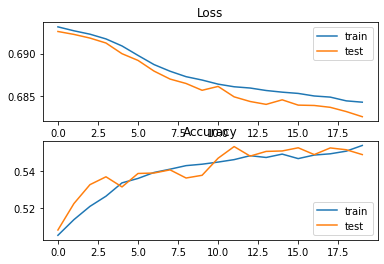

In [62]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [63]:
pred_nn = model.predict(X_test, batch_size=1, verbose=1)

12399/12399 [==============================] - 9s 743us/step


In [64]:
for i in range(len(pred_nn)):
  if pred_nn[i]<0.5:
    pred_nn[i]=0
  else:
    pred_nn[i]=1

np.unique(pred_nn)

array([0., 1.], dtype=float32)

In [65]:
accuracy_score(y_test, pred_nn)

0.5485926284377772

## Using Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [67]:
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [68]:
print(confusion_matrix(y_test,pred_nb))
print(classification_report(y_test,pred_nb, target_names=['risk flag 0', 'risk flag 1'] ))
print(accuracy_score(y_test, pred_nb))

[[2351 3911]
 [1920 4217]]
              precision    recall  f1-score   support

 risk flag 0       0.55      0.38      0.45      6262
 risk flag 1       0.52      0.69      0.59      6137

    accuracy                           0.53     12399
   macro avg       0.53      0.53      0.52     12399
weighted avg       0.53      0.53      0.52     12399

0.5297201387208645


In [69]:
pred_nb

array([0., 1., 0., ..., 1., 0., 0.])

In [70]:
print("Roc_auc_score:", metrics.roc_auc_score(y_test, pred_nb))

Roc_auc_score: 0.5312913561510214


## Using Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [72]:
print(classification_report(y_test,pred_dtree, target_names=['risk flag 0', 'risk flag 1'] ))
print("Accuacy score", accuracy_score(y_test, pred_dtree))
print("Roc_auc_score:", metrics.roc_auc_score(y_test, pred_dtree))

              precision    recall  f1-score   support

 risk flag 0       0.91      0.92      0.92      6262
 risk flag 1       0.92      0.90      0.91      6137

    accuracy                           0.91     12399
   macro avg       0.91      0.91      0.91     12399
weighted avg       0.91      0.91      0.91     12399

Accuacy score 0.9135414146302121
Roc_auc_score: 0.9134334198267628


## Conculsion of Classifier Algorithms

In [73]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [74]:
comparison_matrix = {'Linear Regression': [accuracy_score(y_test, pred_lr), f1_score(y_test, pred_lr), roc_auc_score(y_test, pred_lr)],
                     'Logistic Regression': [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)],
                     'SVM classifier': [accuracy_score(y_test, pred_svm), f1_score(y_test, pred_svm), roc_auc_score(y_test, pred_svm)],
                     'Naive Bayes': [accuracy_score(y_test, pred_nb), f1_score(y_test, pred_nb), roc_auc_score(y_test, pred_nb)],
                     'Random Forest': [accuracy_score(y_test, pred_re), f1_score(y_test, pred_re), roc_auc_score(y_test, pred_re)],
                     'Decison Tree': [accuracy_score(y_test, pred_dtree), f1_score(y_test, pred_dtree), roc_auc_score(y_test, pred_dtree)],
                     'Neural Network': [accuracy_score(y_test, pred_nn), f1_score(y_test, pred_nn), roc_auc_score(y_test, pred_nn)]}

com_matrix = pd.DataFrame(comparison_matrix).transpose()
com_matrix.reset_index(inplace=True)

In [75]:
com_matrix.columns = ['Classification Algorithm','Accuracy Score', 'F1 Score', 'Roc Auc Score']
com_matrix.set_index('Classification Algorithm',inplace=True)
com_matrix

,Accuracy Score,F1 Score,Roc Auc Score
Classification Algorithm,,,
Linear Regression,0.543431,0.559969,0.543865
Logistic Regression,0.543270,0.559745,0.543702
SVM classifier,0.543028,0.559683,0.543464
Naive Bayes,0.529720,0.591237,0.531291
Random Forest,0.901524,0.898292,0.901296
Decison Tree,0.913541,0.911784,0.913433
Neural Network,0.548593,0.551846,0.548722


## Using all the data from the best classifer

In [77]:
train_full = data2.sample(frac=1)
train_X_full = train_full.iloc[:, :-1]
train_y_full = train_full.iloc[:, -1]

print("shape of train X full :",train_X_full.shape)
print("shape of train y full :",train_y_full.shape)

shape of train X full : (61992, 16)
shape of train y full : (61992,)


In [78]:
#using DecisionTree as it is showing the best results
dtc = DecisionTreeClassifier()
dtc.fit(train_X_full, train_y_full) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
#using Random Forest Tree as it is also have a potential score
rf_algo = RandomForestClassifier()
rf_algo.fit(train_X_full, train_y_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Using Classifiers on the Test File

In [84]:
test_file_url = "https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Test%20Data.csv"
test_df = pd.read_csv(test_file_url,)
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [89]:
useful_test = test_df.drop(['id', 'city', 'state'], axis=1)

In [90]:
useful_test.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,Geologist,4,13
1,1215004,25,5,single,rented,no,Firefighter,5,10
2,8901342,50,12,single,rented,no,Lawyer,9,14
3,1944421,49,9,married,rented,yes,Analyst,3,12
4,13429,25,18,single,rented,yes,Comedian,13,11


In [91]:
useful_test['married'] = married_le.transform(useful_test['married'])
useful_test['house_ownership'] = house_le.transform(useful_test['house_ownership'])
useful_test['car_ownership'] = car_le.transform(useful_test['car_ownership'])
useful_test = hash_enc.fit_transform(useful_test)
useful_test.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
0,0,0,1,0,0,0,0,0,7393090,59,19,1,2,0,4,13
1,0,1,0,0,0,0,0,0,1215004,25,5,1,2,0,5,10
2,0,0,0,0,1,0,0,0,8901342,50,12,1,2,0,9,14
3,0,0,0,0,0,1,0,0,1944421,49,9,0,2,1,3,12
4,0,0,1,0,0,0,0,0,13429,25,18,1,2,1,13,11


In [92]:
test_ass = pd.DataFrame(scaler.fit_transform(useful_test))

In [93]:
display(test_ass.head())
test_ass.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.285714,0.75
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120596,0.068966,0.25,1.0,1.0,0.0,0.357143,0.00
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.890037,0.500000,0.60,1.0,1.0,0.0,0.642857,1.00
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.193614,0.482759,0.45,0.0,1.0,1.0,0.214286,0.50
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000312,0.068966,0.90,1.0,1.0,1.0,0.928571,0.25


(28000, 16)

In [94]:
#This Decision tree classifier is trained using 80% of balanced training data
pred_orig_y = dtree.predict(test_ass)

In [95]:
collections.Counter(pred_orig_y)

Counter({0.0: 18633, 1.0: 9367})

In [96]:
#This dicision tree classifier is trained on full balanced training data
pred_y = dtc.predict(test_ass)
collections.Counter(pred_y)

Counter({0.0: 18273, 1.0: 9727})

In [97]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "risk_flag": pred_y.astype('int')
    })
submission.to_csv('submission.csv', index=False)

In [109]:
sub1 = pd.read_csv('submission1.csv')

In [110]:
sub1_vals = sub1.iloc[:, 1]

In [112]:
roc_auc_score(sub1_vals, pred_orig_y)

0.8276523621295037

In [115]:
##using Random forest
pred_orig_rf = rf_algo.predict(test_ass)

In [116]:
collections.Counter(pred_orig_rf)

Counter({0.0: 18877, 1.0: 9123})

In [117]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "risk_flag": pred_y.astype('int')
    })
submission.to_csv('submission3_rf.csv', index=False)